In [2]:
import numpy as np
import pandas as ps
from copy import deepcopy
from random import randint
from matplotlib import pyplot

from sklearn.datasets import make_blobs
import warnings
warnings.filterwarnings('ignore')

## 1) Implement the K-means algorithm 

In [3]:
def dist(a, b):
    return np.linalg.norm(a - b)

def dist_2d(a,b):
    squared_distance = 0
    for i in range(len(a)):
        squared_distance += (a[i] - b[i])**2
    dist = np.sqrt(squared_distance)
    return dist

def generate_random_clusters(n_features, k):
    c_position = []
    for i in range(n_features):
        c_position.append(np.random.randint(0.8 * np.min(x[:, i]), 0.8 * np.max(x[:, i]), size=k)) 
    return c_position

def error(c, c_old):
    return dist(c, c_old)


def kmeans(x, c_positions, number_of_clusters):
    clusters = np.zeros(len(x))
    old_clusters = np.zeros(c_positions.shape)
    error = 1
    while error != 0:
        for i in range(len(x)):
            distances = [dist(x[i], c) for c in c_positions]
            cluster = np.argmin(distances)
            clusters[i] = cluster        
        
        old_clusters = deepcopy(c_positions)
    
        for j in range(0, number_of_clusters):
            points = [x[n] for n in range(len(x)) if clusters[n] == j]
            c_positions[j] = np.mean(points, axis=0)        
        
        error = dist(c_positions, old_clusters) # check for convergence
        
    return c_positions, clusters

def plot_in_col(x, number_of_clusters, p, new_clusters):
    for i in range(number_of_clusters):
        col_points = np.array([x[n] for n in range(len(x)) if p[n] == i])
        pyplot.scatter(col_points[:, 0], col_points[:, 1], s=10)
    pyplot.scatter(new_clusters[:, 0], new_clusters[:, 1], marker='*', s=300, c='r')
    pyplot.show()

In [18]:
def generate_fake_data(f_centers):
    x, y = make_blobs(n_samples=5000, centers=f_centers, n_features=2, random_state=195)
    xx = deepcopy(x)
    yy = deepcopy(y)
    return f_centers, x, xx, yy

def plot_reg_data(x):
    %matplotlib inline
    pyplot.scatter(x[:, 0], x[:, 1])
    pyplot.show()  
    
def gen_rand_cluster(nub_cluster):
    n_features = 2
    c_pos = generate_random_clusters(n_features, nub_cluster) 
    c_pos = np.array(c_pos).T
    return c_pos

def get_centroids(x, cent_pos):
    pyplot.scatter(x[:, 0], x[:, 1])
    pyplot.scatter(cent_pos[:, 0], cent_pos[:, 1], marker='*', s=300, c='orange')
    pyplot.show()

In [19]:
f_centers = 4
f_cent, x, xx, yy = generate_fake_data(f_centers)
print(f_cent)

4


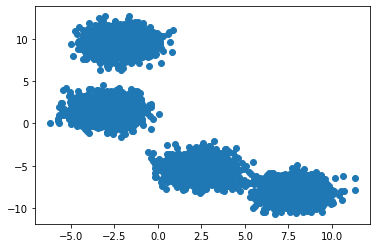

In [20]:
plot_reg_data(x)

In [21]:
cc_pos = gen_rand_cluster(f_cent)
cc_pos

array([[ 8, -8],
       [-3, -6],
       [ 7,  4],
       [ 2, -2]])

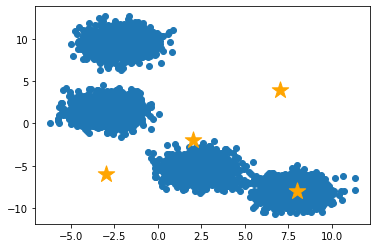

In [22]:
get_centroids(x, cc_pos)

In [23]:
nc, p = kmeans(x, cc_pos, f_cent)

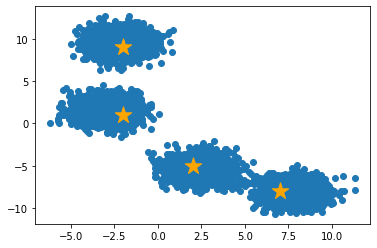

In [24]:
get_centroids(x, nc)

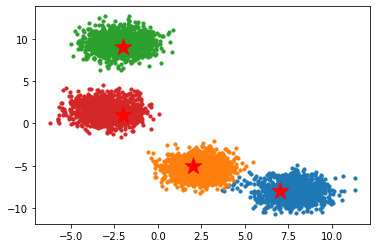

In [25]:
plot_in_col(x, f_cent, p, nc)

Do you get the same result every time?
- The result will often be similar for us but no the same. K-means is an algorithm that is in a way moving centroids iteratively so that they become better and better at splitting data and while this process is deterministic, you have to pick initial values for those centroids and this is usually done at random.

How do you determine what the final result should be?

How do you choose what K value to use?




In [26]:
# Testing the distance methon
test_sse = dist_2d(nc, p)
print(len(test_sse))
print(test_sse[0], test_sse[1])

2
8.18535277187245 14.177446878757825


In [86]:
'''
Generating new clusters and calculating distance 
'''
nc_lst = [] # centroid pos
p_lst = [] # cluster pos
centroids_lst = [] # number of centroids per cluster
k=5
for i in range(1,k):
    f_cent, x, xx, yy = generate_fake_data(i)
    cc_pos = gen_rand_cluster(k)
    nc, p = kmeans(x, cc_pos, k)
    # appending positions to list
    nc_lst.append(nc)
    p_lst.append(p)
    centroids_lst.append(x)
    
sum_lst = []
for i in range(len(nc_lst)):
    # distance betwwn centroid and repective cluster
    test_sse_1 = dist_2d(nc_lst[i], p_lst[i]) 
    # appending each distance to list
    sum_lst.append(test_sse_1)

In [87]:
print(sum_lst)

[array([11.      , 18.734994]), array([2.14748365e+09, 2.14748365e+09]), array([2.14748365e+09, 2.14748365e+09]), array([2.14748365e+09, 2.14748365e+09])]


In [88]:
print(nc_lst)

[array([[ 8, -6],
       [ 6, -5],
       [ 7, -8],
       [ 6, -6],
       [ 5, -7]]), array([[-2147483648, -2147483648],
       [         -1,           0],
       [          7,          -8],
       [          7,          -6],
       [         -2,           1]]), array([[          2,          -5],
       [          7,          -8],
       [-2147483648, -2147483648],
       [         -3,           1],
       [         -1,           2]]), array([[         -2,           1],
       [          7,          -8],
       [-2147483648, -2147483648],
       [         -2,           9],
       [          2,          -5]])]


In [78]:
cc_sort = np.sort(nc_lst)
cent_sort = np.sort(centroids_lst)
#print(cc_sort)
#print(len(cent_sort))

In [79]:
'''
getting lowes value
'''
#for c in range(len(sum_lst)):
sum_sort = np.sort(np.array(sum_lst), axis=1)
sum_sort

array([[3.03700050e+09, 3.03700050e+09],
       [3.71955079e+09, 3.71955079e+09],
       [5.29150262e+00, 1.43874946e+01],
       [9.21954446e+00, 1.32287566e+01]])

In [80]:
# make one-dimn array and sort (decending)
x_test = np.concatenate(sum_sort)
x_test = np.sort(x_test)[::-1]
print(x_test)

[3.71955079e+09 3.71955079e+09 3.03700050e+09 3.03700050e+09
 1.43874946e+01 1.32287566e+01 9.21954446e+00 5.29150262e+00]


Text(0, 0.5, 'SUM OF SQUARE ERROR')

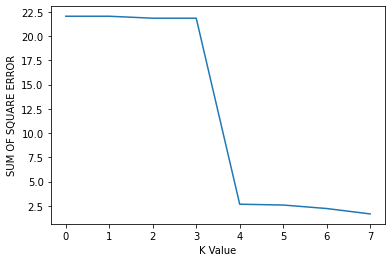

In [84]:
pyplot.plot(np.log(x_test))
pyplot.xlabel('K Value')
pyplot.ylabel('SUM OF SQUARE ERROR')

**GÄMFÖR!!!**

In [55]:
'''
Funkar int än... Kolla över silhouette_score 
'''
def silhouette_method(x, c_pos, ncent, k_max):
    sil = []
    kmax = k_max  
    
    for k in range(2, kmax+1):
        nc, p = kmeans(x, cc_pos, f_cent)
        labels = p
    #kmeans = KMeans(n_clusters = k).fit(x)
    #labels = kmeans.labels_
    sil.append(silhouette_score(x, labels, metric = 'euclidean'))

In [ ]:
sil = []
kmax = 10

# dissimilarity would not be defined for a single cluster, thus, minimum number of clusters should be 2
for k in range(2, kmax+1):
    kmeans = KMeans(n_clusters = k).fit(x)
    labels = kmeans.labels_
    sil.append(silhouette_score(x, labels, metric = 'euclidean'))

## 2) Apply the K-means algorithm to compress an image